In [2]:
# Código en R

library(starsdata)
library(terra)
library(stars)
library(reticulate)

# 1. Localización del ZIP dentro del paquete starsdata
f <- "sentinel/S2A_MSIL1C_20180220T105051_N0206_R051_T32ULE_20180221T134037.zip"
granule <- system.file(file = f, package = "starsdata")
granule

# 2. Construcción de la ruta Virtual de GDAL (/vsizip/)
# Rompemos la cadena en varias líneas para que LaTeX pueda procesarla
base_name <- strsplit(basename(granule), ".zip")[[1]]
base_name


# Esta ruta permite leer directamente el XML de metadatos dentro del ZIP sin descomprimir.
#s2_path <- paste0("SENTINEL2_L1C:/vsizip/", granule, "/", base_name, ".SAFE/MTD_MSIL1C.xml:10m:EPSG_32632")
s2_path <- paste0(
  "SENTINEL2_L1C:/vsizip/", 
  granule, 
  "/", 
  base_name, 
  ".SAFE/MTD_MSIL1C.xml:10m:EPSG_32632"
)
#s2_path

# Mostramos el resultado sin comillas ni índices [1] para el libro
cat("Ruta generada:", s2_path, fill = TRUE)

# Guardamos la ruta en un archivo compartido para que Python y Julia la lean
writeLines(s2_path, "s2_shared_path.txt")

[1] "/usr/local/lib/R/site-library/starsdata/sentinel/S2A_MSIL1C_20180220T105051_N0206_R051_T32ULE_20180221T134037.zip"

[1] "S2A_MSIL1C_20180220T105051_N0206_R051_T32ULE_20180221T134037"

Ruta generada: 
SENTINEL2_L1C:/vsizip//usr/local/lib/R/site-library/starsdata/sentinel/S2A_MSIL1C_20180220T105051_N0206_R051_T32ULE_20180221T134037.zip/S2A_MSIL1C_20180220T105051_N0206_R051_T32ULE_20180221T134037.SAFE/MTD_MSIL1C.xml:10m:EPSG_32632


🟤 Terra: 10.672 seg | mean = 3766.625 


,used,(Mb),gc trigger,(Mb),max used,(Mb)
Ncells,2606401,139.2,5034424,268.9,5034424,268.9
Vcells,5050998,38.6,10146329,77.5,8362057,63.8


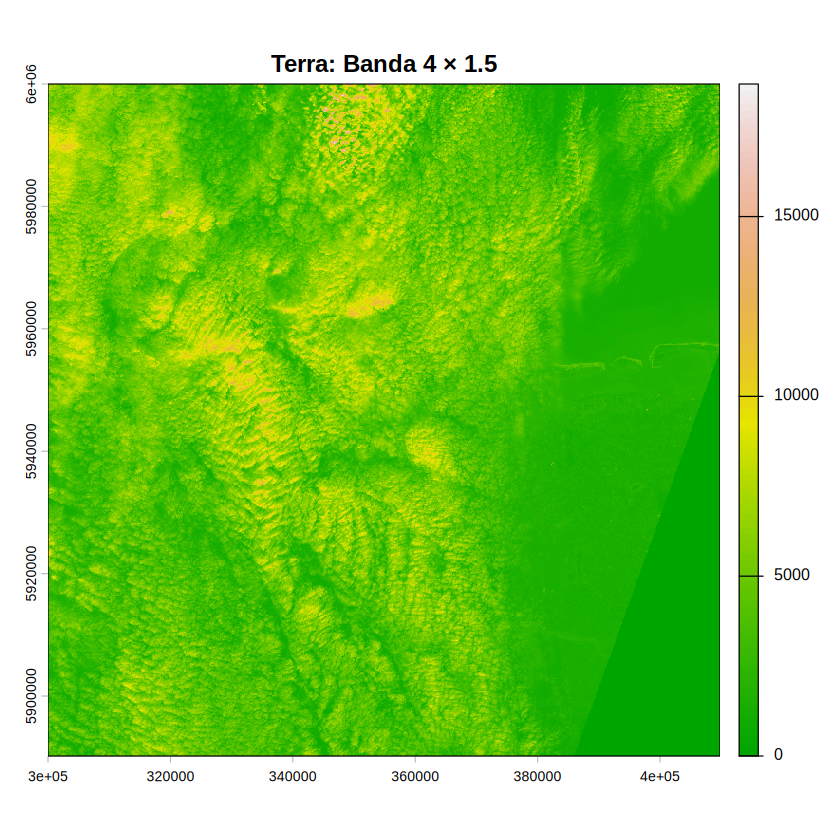

In [3]:
# Código en R
library(terra)
# ------------------------------------------------
# 0. Inicio del cronómetro
# ------------------------------------------------
t0 <- Sys.time()

# ------------------------------------------------
# 1. Abrir raster en modo proxy (NO RAM)
# ------------------------------------------------
r <- rast(s2_path)

# ------------------------------------------------
# 2. Seleccionar solo la banda 4 (sigue siendo proxy)
# ------------------------------------------------
b4 <- r[[1]]

# ------------------------------------------------
# 3. Operación aritmética (lazy)
# ------------------------------------------------
res_terra <- b4 * 1.5

# ------------------------------------------------
# 4. FORZADO REAL (streaming, sin materializar)
# ------------------------------------------------
m_terra <- global(res_terra, "mean", na.rm = TRUE)[1, 1]

# ------------------------------------------------
# 5. Tiempo total
# ------------------------------------------------
t_terra <- as.numeric(Sys.time() - t0)

cat("🟤 Terra:",
    round(t_terra, 3), "seg |",
    "mean =", round(m_terra, 6), "\n")

# ------------------------------------------------
# 6. Plot (FUERA DEL BENCHMARK, proxy)
# ------------------------------------------------
plot(res_terra, col = terrain.colors(100),
     main = "Terra: Banda 4 × 1.5")

# ------------------------------------------------
# 7. Limpieza
# ------------------------------------------------
rm(r, b4, res_terra)
gc()